In [24]:
import pandas as pd

data = pd.read_csv('data/23-11-18_15-30_adresses_places_id.csv')

data_weather = pd.read_csv('data/weather-22-to-05-11-23.csv')

In [25]:

data_weather["time"] = pd.to_datetime(data_weather["time"], format="%Y-%m-%dT%H:%M")


0       2022-01-01 00:00:00
1       2022-01-01 01:00:00
2       2022-01-01 02:00:00
3       2022-01-01 03:00:00
4       2022-01-01 04:00:00
                ...        
16171   2023-11-05 19:00:00
16172   2023-11-05 20:00:00
16173   2023-11-05 21:00:00
16174   2023-11-05 22:00:00
16175   2023-11-05 23:00:00
Name: time, Length: 16176, dtype: datetime64[ns]

In [27]:
data["start_time"] = pd.to_datetime(data["start_time"], format="%Y-%m-%d %H:%M:%S")

data["start_time"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 234466 entries, 0 to 234465
Series name: start_time
Non-Null Count   Dtype         
--------------   -----         
234466 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.8 MB


In [28]:

data.set_index('start_time', inplace=True)

data['rental_number'] = 1

rentals_in_hours = data['rental_number'].resample('H').sum()

print(rentals_in_hours)

start_time
2022-04-01 00:00:00     1
2022-04-01 01:00:00     0
2022-04-01 02:00:00     0
2022-04-01 03:00:00     0
2022-04-01 04:00:00     0
                       ..
2023-10-31 19:00:00    18
2023-10-31 20:00:00    16
2023-10-31 21:00:00    24
2023-10-31 22:00:00    19
2023-10-31 23:00:00    11
Freq: H, Name: rental_number, Length: 13896, dtype: int64


In [30]:
merged_data = pd.merge(rentals_in_hours, data_weather, how = "left", left_on = "start_time", right_on = "time" )

In [70]:
#data transfer check
merged_data["rental_number"].sum()

234466

In [35]:
merged_data["rain_yes_no"] = True
mask = merged_data["rain (mm)"] == 0
merged_data.loc[mask, "rain_yes_no"] = False

merged_data


,rental_number,time,temperature_2m (°C),rain (mm),snowfall (cm),wind_speed_10m (km/h),wind_gusts_10m (km/h),is_day (),rain_yes_no
0,1,2022-04-01 00:00:00,2.3,0.1,0.0,14.9,29.2,0,True
1,0,2022-04-01 01:00:00,2.0,0.3,0.0,13.7,25.9,0,True
2,0,2022-04-01 02:00:00,2.0,0.1,0.0,13.9,23.8,0,True
3,0,2022-04-01 03:00:00,2.2,0.1,0.0,16.2,27.7,0,True
4,0,2022-04-01 04:00:00,2.1,0.0,0.0,15.0,27.7,0,False
...,...,...,...,...,...,...,...,...,...
13891,18,2023-10-31 19:00:00,9.7,0.0,0.0,9.9,17.6,0,False
13892,16,2023-10-31 20:00:00,9.1,0.0,0.0,9.5,18.0,0,False
13893,24,2023-10-31 21:00:00,8.5,0.0,0.0,8.7,16.6,0,False
13894,19,2023-10-31 22:00:00,8.3,0.0,0.0,9.9,17.6,0,False


In [76]:

rainy = merged_data[merged_data["rain (mm)"] > 0]
dry = merged_data[merged_data["rain (mm)"] == 0]


prumer_destive = rainy['rental_number'].mean()
prumer_nedestive = dry['rental_number'].mean()


print(f'Průměrný počet výpůjček v deštivých hodinách: {prumer_destive}')
print(f'Průměrný počet výpůjček v nedeštivých hodinách: {prumer_nedestive}')
len(rainy)

Průměrný počet výpůjček v deštivých hodinách: 13.37351443123939
Průměrný počet výpůjček v nedeštivých hodinách: 17.38271910297634


1767

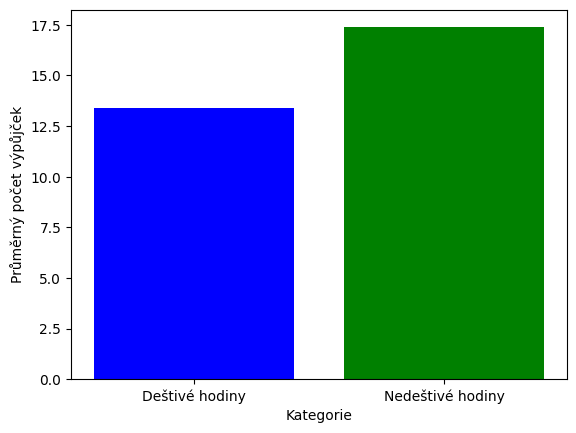

In [77]:
import matplotlib.pyplot as plt

kategorie = ['Deštivé hodiny', 'Nedeštivé hodiny']

hodnoty = [prumer_destive, prumer_nedestive]

plt.bar(kategorie, hodnoty, color=['blue', 'green'])


plt.xlabel('Kategorie')
plt.ylabel('Průměrný počet výpůjček')



# Zobrazení grafu
plt.show()

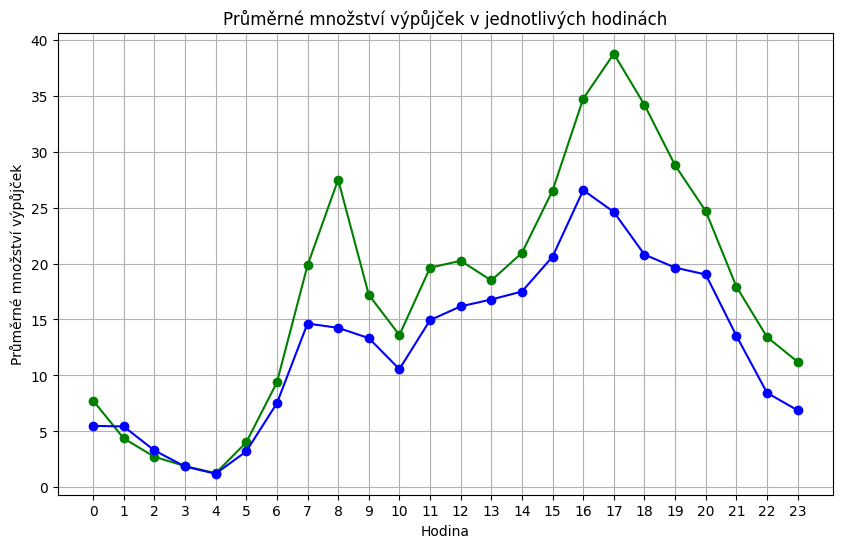

In [78]:

prumer_vypujcek_dry = dry.groupby(dry['time'].dt.hour)['rental_number'].mean()
prumer_vypujcek_rain = rainy.groupby(rainy['time'].dt.hour)['rental_number'].mean()


# Vytvoření grafu
plt.figure(figsize=(10, 6))
plt.plot(prumer_vypujcek_dry.index, prumer_vypujcek_dry.values, marker='o', linestyle='-', color = "green")
plt.plot(prumer_vypujcek_rain.index, prumer_vypujcek_rain.values, marker='o', linestyle='-', color = "blue")
plt.title('Průměrné množství výpůjček v jednotlivých hodinách')
plt.xlabel('Hodina')
plt.ylabel('Průměrné množství výpůjček')
plt.xticks(range(24))  # nastavení hodin na x-ové ose
plt.grid(True)
plt.show()


In [ ]:
#teplotička

In [83]:
merged_data["temperature"] = merged_data["temperature_2m (°C)"].round().astype(int)
merged_data["temperature"].min()

-12

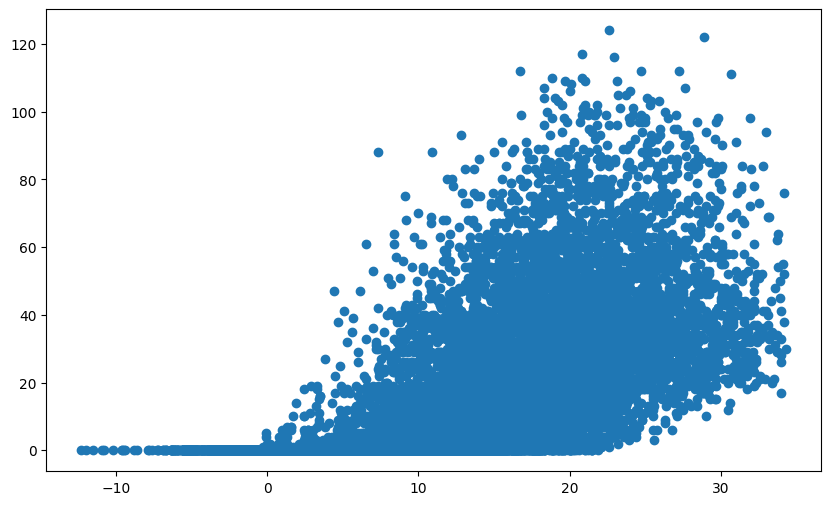

In [84]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_data["temperature_2m (°C)"], merged_data["rental_number"] )

#hodit slider na hodiny?